## Descriptive statistics

In [19]:
import pandas as pd

df = pd.read_csv("group3.csv")
print(df.describe())
print(df.info())
print(df.head())

              No    b_count       chi1       dens
count  45.000000  45.000000  45.000000  45.000000
mean   23.000000  40.377778  10.865415   1.071769
std    13.133926  11.410300   2.873539   0.105268
min     1.000000  27.000000   7.754020   0.952401
25%    12.000000  31.000000   8.754020   1.003471
50%    23.000000  38.000000   9.754020   1.040960
75%    34.000000  47.000000  12.260458   1.120157
max    45.000000  81.000000  19.481426   1.513883
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       45 non-null     int64  
 1   name     45 non-null     object 
 2   b_count  45 non-null     int64  
 3   chi1     45 non-null     float64
 4   dens     45 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.9+ KB
None
   No    name  b_count       chi1      dens
0   1  ACIEL1       39   9.396754  1.003471
1   2  ACIEL2       55  14.

## Distributions

array([[<Axes: title={'center': 'b_count'}>,
        <Axes: title={'center': 'chi1'}>],
       [<Axes: title={'center': 'dens'}>, <Axes: >]], dtype=object)

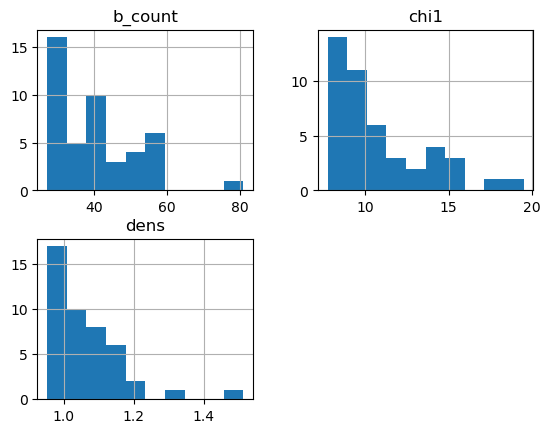

In [20]:
df[['b_count', 'chi1', 'dens']].hist()

## Histogram by molecule type

### create new column with molecule type

In [21]:
import re

type = df["name"].str.replace(r'\d+', '', regex=True)
df["type"] = type

<Axes: xlabel='type'>

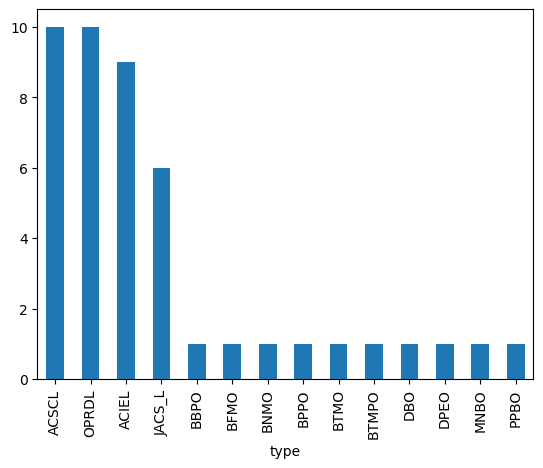

In [22]:
df["type"].value_counts().plot(kind='bar')

In [23]:
types_counts = df['type'].value_counts()
types_with_more_than_5 = types_counts[types_counts > 5]

df['type_grouped'] = df['type'].apply(lambda x: x if types_with_more_than_5.get(x, 0) > 5 else 'Other')

<Axes: xlabel='dens'>

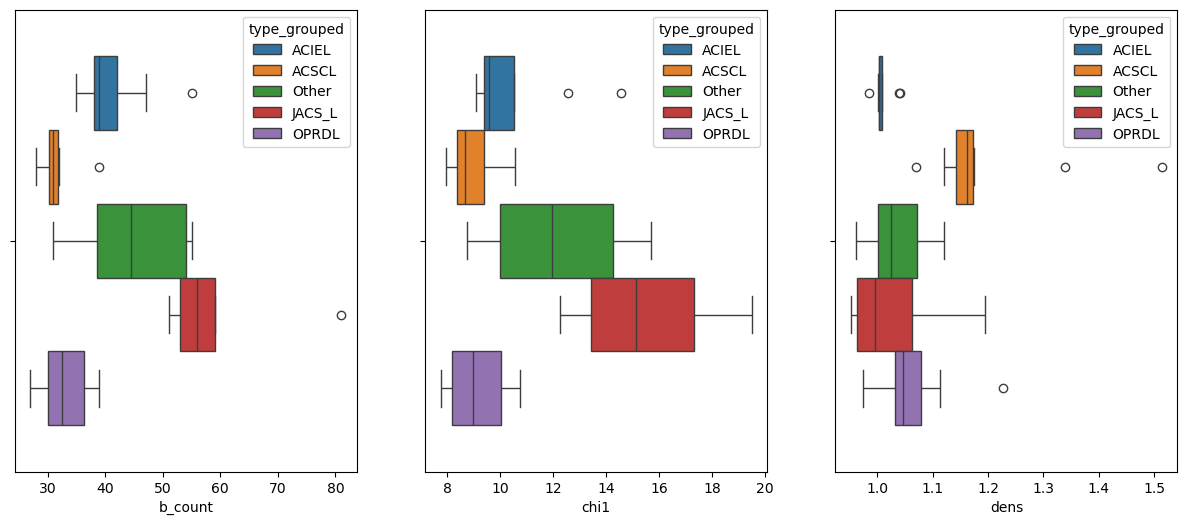

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(data=df, x="b_count", hue="type_grouped", ax=axs[0])
sns.boxplot(data=df, x="chi1", hue="type_grouped", ax=axs[1])
sns.boxplot(data=df, x="dens", hue="type_grouped", ax=axs[2])


## Correlations

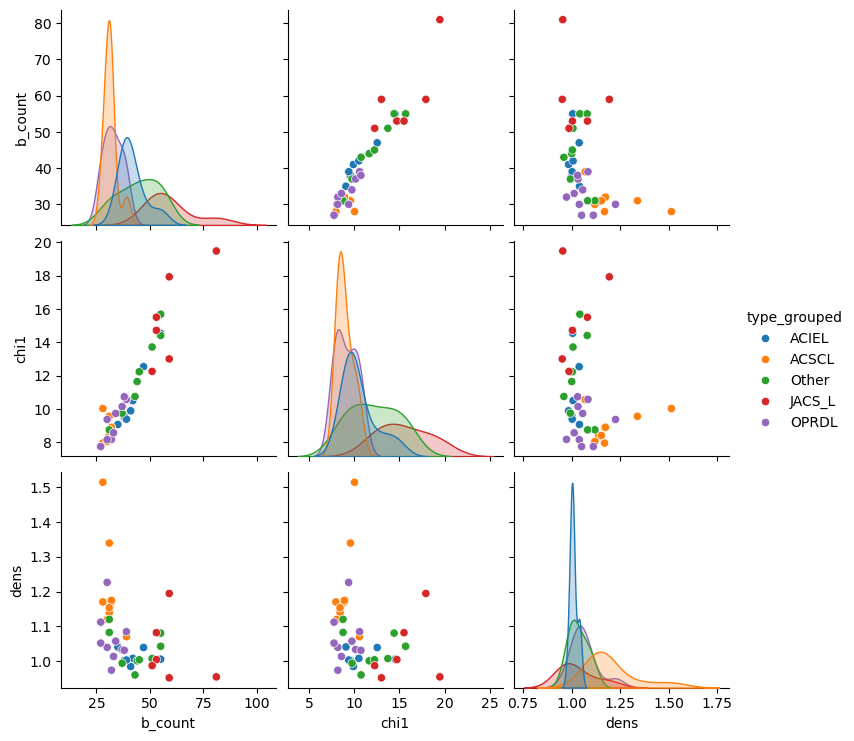

In [27]:
import numpy as np

columns = ['b_count', 'chi1', 'dens', 'type_grouped']
sns.pairplot(df[columns], hue = 'type_grouped')

Text(0.5, 1.0, 'Correlation Matrix')

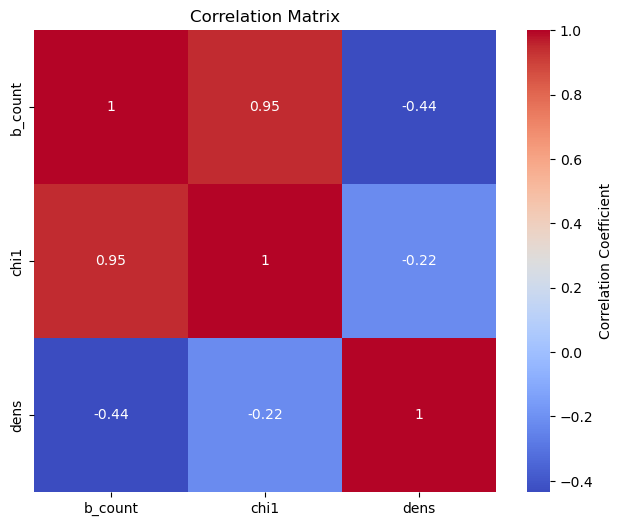

In [28]:
correlation_matrix = df[['b_count', 'chi1', 'dens']].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')

## Boostrap